In [23]:
import pandas as pd
import csv
import os     
import matplotlib.pyplot as plt
import stock_analysis 


In [24]:
#jan 4, 2016 to dec 31, 2017 (Pennymac Mortgage Trust)

pmt_df = pd.read_csv("nasdaq_data/Pennymac_Mortgage_Trust.CSV")

pmt_df['Date']= pd.to_datetime(pmt_df['Date'], format = '%Y-%m-%d')

filtered_pmt_df = pmt_df.loc[(pmt_df["Date"] >= '2009-01-04')& (pmt_df["Date"] < '2018-01-01')]

filtered_pmt_df


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2009-07-30,19.00,19.3700,18.960,19.10,6670500.0,0.0,1.0,8.173341,8.332506,8.156134,8.216358,6670500.0
1,2009-07-31,19.19,19.1900,18.800,18.80,1445600.0,0.0,1.0,8.255074,8.255074,8.087305,8.087305,1445600.0
2,2009-08-03,18.81,19.1700,18.700,19.00,680300.0,0.0,1.0,8.091607,8.246470,8.044288,8.173341,680300.0
3,2009-08-04,19.00,19.1400,18.900,19.10,284300.0,0.0,1.0,8.173341,8.233565,8.130323,8.216358,284300.0
4,2009-08-05,18.90,19.1500,18.900,19.09,148400.0,0.0,1.0,8.130323,8.237867,8.130323,8.212056,148400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2017-12-22,16.49,16.6200,16.440,16.46,582610.0,0.0,1.0,16.490000,16.620000,16.440000,16.460000,582610.0
2116,2017-12-26,16.46,16.7100,16.460,16.62,533747.0,0.0,1.0,16.460000,16.710000,16.460000,16.620000,533747.0
2117,2017-12-27,16.63,16.6733,16.495,16.56,626210.0,0.0,1.0,16.630000,16.673300,16.495000,16.560000,626210.0
2118,2017-12-28,16.09,16.2800,16.040,16.26,484907.0,0.0,1.0,16.090000,16.280000,16.040000,16.260000,484907.0


In [25]:
#dataframe for the dividend returns
dividend_pmt_df = filtered_pmt_df.loc[(filtered_pmt_df["Ex-Dividend"] > 0)]

dividend_pmt_df


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
261,2010-08-12,17.15,17.4800,16.89,17.26,112700.0,0.35,1.0,7.527117,7.671954,7.413004,7.575396,112700.0
329,2010-11-17,17.52,17.7100,17.27,17.43,54900.0,0.42,1.0,7.874799,7.960200,7.762431,7.834347,54900.0
365,2011-01-10,18.08,18.0800,17.73,17.96,104700.0,0.42,1.0,8.316546,8.316546,8.155551,8.261348,104700.0
450,2011-05-12,17.70,17.8400,17.62,17.75,248800.0,0.42,1.0,8.334401,8.400323,8.296732,8.357945,248800.0
514,2011-08-12,15.94,16.4400,15.86,16.19,58400.0,0.50,1.0,7.737469,7.980175,7.698636,7.858822,58400.0
579,2011-11-14,16.81,16.8299,16.64,16.76,68400.0,0.50,1.0,8.403208,8.413156,8.318226,8.378213,68400.0
642,2012-02-15,18.10,18.3100,17.96,17.96,1241200.0,0.55,1.0,9.325155,9.433348,9.253027,9.253027,1241200.0
703,2012-05-14,18.66,18.9500,18.35,18.94,877100.0,0.55,1.0,9.892840,10.046587,9.728490,10.041286,877100.0
767,2012-08-14,22.03,22.3500,21.94,22.08,508800.0,0.55,1.0,11.970419,12.144297,11.921515,11.997587,508800.0
830,2012-11-14,23.59,23.8499,22.60,22.65,2282300.0,0.57,1.0,13.140648,13.285424,12.589175,12.617028,2282300.0


In [26]:
#add up the dividend row 
dividend_total_pmt = dividend_pmt_df['Ex-Dividend'].sum()

dividend_total_pmt

16.120000000000005

In [27]:
# For loop to figure out dividend in a real world scenario

total_cash = 0
investable_cash = 1000
total_stock_vol = 0
dividend_cash = 0
dividend_purchase = 0
dividend_stock= 0
purchase_price = dividend_pmt_df.iloc[:,4]
dividend_rate = dividend_pmt_df.iloc[:,6]


for i,r in dividend_pmt_df.iterrows():
    print(r["Date"])





    

    




2010-08-12 00:00:00
2010-11-17 00:00:00
2011-01-10 00:00:00
2011-05-12 00:00:00
2011-08-12 00:00:00
2011-11-14 00:00:00
2012-02-15 00:00:00
2012-05-14 00:00:00
2012-08-14 00:00:00
2012-11-14 00:00:00
2012-11-15 00:00:00
2013-02-19 00:00:00
2013-05-14 00:00:00
2013-08-15 00:00:00
2013-11-13 00:00:00
2014-01-08 00:00:00
2014-04-14 00:00:00
2014-07-11 00:00:00
2014-10-10 00:00:00
2014-12-26 00:00:00
2015-04-13 00:00:00
2015-07-14 00:00:00
2015-10-13 00:00:00
2015-12-23 00:00:00
2016-04-08 00:00:00
2016-07-12 00:00:00
2016-10-05 00:00:00
2016-12-28 00:00:00
2017-04-11 00:00:00
2017-07-11 00:00:00
2017-10-12 00:00:00


In [28]:
"""if total_stock_vol == 0:

        investable_cash = 1000
        inital_stock = investable_cash/purchase_price
        dividend_cash = inital_stock * dividend_rate
        dividend_stock = purchase_price/dividend_cash
        total_stock_vol = inital_stock + dividend_stock
    else:
        dividend_cash = total_stock_vol * dividend_rate
        dividend_stock = purchase_price/dividend_cash
        total_stock_vol = total_stock_vol + dividend_stock

total_stock_vol"""

'if total_stock_vol == 0:\n\n        investable_cash = 1000\n        inital_stock = investable_cash/purchase_price\n        dividend_cash = inital_stock * dividend_rate\n        dividend_stock = purchase_price/dividend_cash\n        total_stock_vol = inital_stock + dividend_stock\n    else:\n        dividend_cash = total_stock_vol * dividend_rate\n        dividend_stock = purchase_price/dividend_cash\n        total_stock_vol = total_stock_vol + dividend_stock\n\ntotal_stock_vol'

In [29]:
#jan 2016 to dec 2017 (Reality Income Corp)

O_df = pd.read_csv("nasdaq_data/Realty_Income_Corp.CSV")

O_df['Date']= pd.to_datetime(O_df['Date'], format = '%Y-%m-%d')

filtered_O_df = O_df.loc[(O_df["Date"] >= '2010-08-12')& (O_df["Date"] < '2018-01-01')]

filtered_O_df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
3983,2010-08-12,32.160,32.4300,31.90,31.96,422300.0,0.0,1.0,22.790662,22.982002,22.606409,22.648929,422300.0
3984,2010-08-13,31.950,32.8300,31.93,32.48,649300.0,0.0,1.0,22.641843,23.265468,22.627669,23.017435,649300.0
3985,2010-08-16,32.330,32.8268,32.31,32.65,489400.0,0.0,1.0,22.911135,23.263200,22.896962,23.137908,489400.0
3986,2010-08-17,32.930,33.2300,32.66,33.03,593300.0,0.0,1.0,23.336334,23.548934,23.144995,23.407201,593300.0
3987,2010-08-18,32.890,33.1700,32.65,32.83,323000.0,0.0,1.0,23.307988,23.506414,23.137908,23.265468,323000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,2017-12-22,55.595,55.9000,55.30,55.85,984532.0,0.0,1.0,55.595000,55.900000,55.300000,55.850000,984532.0
5838,2017-12-26,55.930,56.4900,55.74,56.23,940497.0,0.0,1.0,55.930000,56.490000,55.740000,56.230000,940497.0
5839,2017-12-27,56.380,56.9800,56.12,56.72,1235687.0,0.0,1.0,56.380000,56.980000,56.120000,56.720000,1235687.0
5840,2017-12-28,56.740,57.1500,56.51,57.12,1301358.0,0.0,1.0,56.740000,57.150000,56.510000,57.120000,1301358.0


In [30]:
#dataframe for the divident returns 
dividend_O_df = filtered_O_df.loc[(filtered_O_df["Ex-Dividend"] > 0)]

dividend_O_df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
3995,2010-08-30,32.54,32.7100,32.20,32.23,498500.0,0.143625,1.0,23.162716,23.283726,22.920696,22.942051,498500.0
4016,2010-09-29,33.60,33.9000,33.54,33.78,961800.0,0.143937,1.0,24.019160,24.233617,23.976269,24.147834,961800.0
4037,2010-10-28,34.60,35.0000,34.13,34.42,633600.0,0.143937,1.0,24.837448,25.124586,24.500061,24.708236,633600.0
4058,2010-11-29,34.19,34.5000,33.92,34.31,727700.0,0.143937,1.0,24.646095,24.869560,24.451463,24.732597,727700.0
4080,2010-12-30,34.48,34.5600,34.35,34.41,450200.0,0.144250,1.0,24.959338,25.017249,24.865234,24.908667,450200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,2017-06-29,56.39,56.4500,55.44,55.77,1627828.0,0.212000,1.0,55.547161,55.606265,54.611361,54.936428,1627828.0
5735,2017-07-28,57.89,58.1913,57.11,57.20,1413349.0,0.212000,1.0,57.236092,57.533989,56.464903,56.553886,1413349.0
5758,2017-08-30,56.89,57.0150,56.57,56.92,1205549.0,0.212000,1.0,56.456883,56.580931,56.139319,56.486654,1205549.0
5779,2017-09-29,57.50,57.6000,56.85,57.19,2713976.0,0.212000,1.0,57.273765,57.373371,56.626322,56.964985,2713976.0


In [31]:
#add up the dividend row
dividend_total_O = dividend_O_df['Ex-Dividend'].sum()

dividend_total_O

15.550476

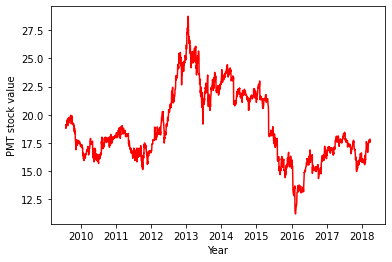

FileNotFoundError: [Errno 2] No such file or directory: '../Images/avg_state_rain.png'

<Figure size 432x288 with 0 Axes>

In [32]:
pmt_x_values = pmt_df['Date']
pmt_y_values = pmt_df['Close']


line_plot = plt.plot(pmt_x_values, pmt_y_values, color="red")

plt.xlabel('Year')
plt.ylabel('PMT stock value')
plt.show()

plt.savefig("../Images/avg_state_rain.png")

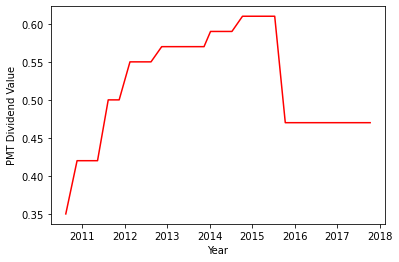

In [ ]:
pmt_x_values = dividend_pmt_df['Date']
pmt_y_values = dividend_pmt_df['Ex-Dividend']


scatter_plot = plt.plot(pmt_x_values, pmt_y_values, color="red")

plt.xlabel('Year')
plt.ylabel('PMT Dividend Value')
plt.show()

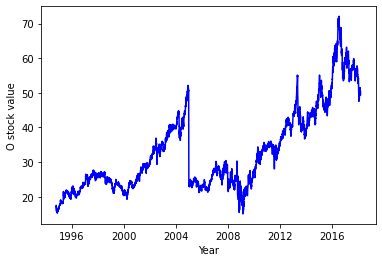

In [ ]:

O_x_values = O_df['Date']
O_y_values = O_df['Close']

line_O_plot = plt.plot(O_x_values, O_y_values, color="blue")

plt.xlabel('Year')
plt.ylabel('O stock value')
plt.show()


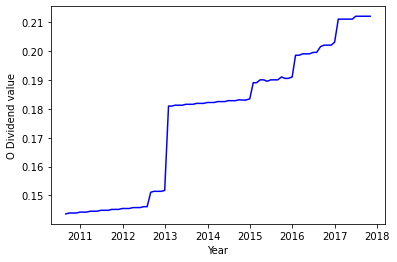

In [ ]:
O_x_values = dividend_O_df['Date']
O_y_values = dividend_O_df['Ex-Dividend']



scatter_O_plot = plt.plot(O_x_values, O_y_values, color="blue")

plt.xlabel('Year')
plt.ylabel('O Dividend value')
plt.show()


In [33]:
reader = stock_analysis.StockReader('2010-06-01', '2018-01-01')

# get stock data
pmt, o = (
    reader.get_ticker_data(ticker) \
    for ticker in ['o', 'pmt'])

# get NASDAQ data
nye = reader.get_index_data('NASDAQ')



In [35]:
from stock_analysis.utils import group_stocks, describe_group

stocks = group_stocks(
    {'Pennymac Mortgage Trust':pmt,
     'Realty Income Corp': o
     }
)

stocks_nasdaq = group_stocks(
    {'Pennymac Mortgage Trust':pmt,
     'Realty Income Corp': o,
    'NASDAQ' : nye
    }
)

pmt

,open,high,low,close,adj_close,volume
date,,,,,,
2010-06-01,30.048450,30.300388,29.515505,29.593023,16.597950,684835
2010-06-02,29.835272,30.406977,29.428295,30.406977,17.054474,686074
2010-06-03,30.687984,30.687984,29.970930,30.184109,16.929470,362954
2010-06-04,29.815891,29.970930,28.585272,28.682171,16.087070,1164818
2010-06-07,28.701550,29.428295,28.585272,28.769381,16.135986,498559
...,...,...,...,...,...,...
2017-12-22,53.691860,54.166668,53.585270,54.118217,43.205650,1016933
2017-12-26,54.195736,54.738373,54.011627,54.486435,43.499611,977923
2017-12-27,54.631783,55.213177,54.379845,54.961239,43.878662,1302281


In [36]:
pmt_viz = stock_analysis.StockVisualizer(pmt)


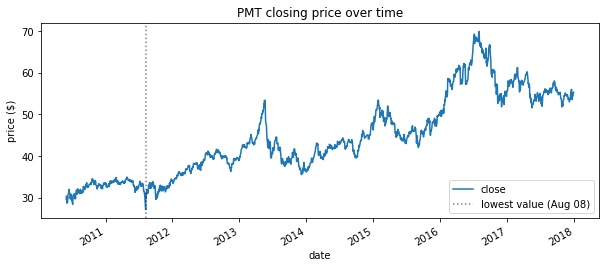

In [38]:
ax = pmt_viz.evolution_over_time(
    'close',
    figsize=(10, 4),
    legend=False,
    title='PMT closing price over time'
)
pmt_viz.add_reference_line(
    ax,
    x=pmt.low.idxmin(),
    color='k',
    linestyle=':',
    label=f'lowest value ({pmt.low.idxmin():%b %d})',
    alpha=0.5
)
ax.set_ylabel('price ($)')
plt.savefig()
plt.show()